# 보스톤 주택 가격 데이터 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
boston = load_boston()

In [20]:
bostonDF = pd.DataFrame(data = boston.data, columns = boston.feature_names)

In [21]:
pd.set_option('display.max_columns', None)

In [22]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
bostonDF['PRICE'] = boston.target

In [24]:
bostonDF.shape

(506, 14)

In [25]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


- CRIM : 지역별 범죄 발생률 
- ZN : 25,000 평방 피트를 초과하는 거주 지역의 비율 
- INDUS : 비상업 지역 넓이 비율 
- CHAS : 찰스강에 대한 더비 변수 ( 경계에 있으면 1, 아니면 0 )
- NOX : 일산화질소 농도 
- RM : 거주할 수 있는 방 개수 
- AGE : 1940년 이전에 건축된 소유 주택의 비율 
- DIS : 5개 주요 고용센터까지의 가중 거리
- RAD : 고속도로 접근 용이도 
- TAX : 10,000달러당 재산세율 
- PTRARIO : 지역의 교사와 학생 비율 
- B : 지역의 흑인 거주 비율 
- LSTAT : 하위 계층의 비율 
- MEDV : 본인 소유의 주택 가격(중앙값)
- PRICE : 주택 가격 

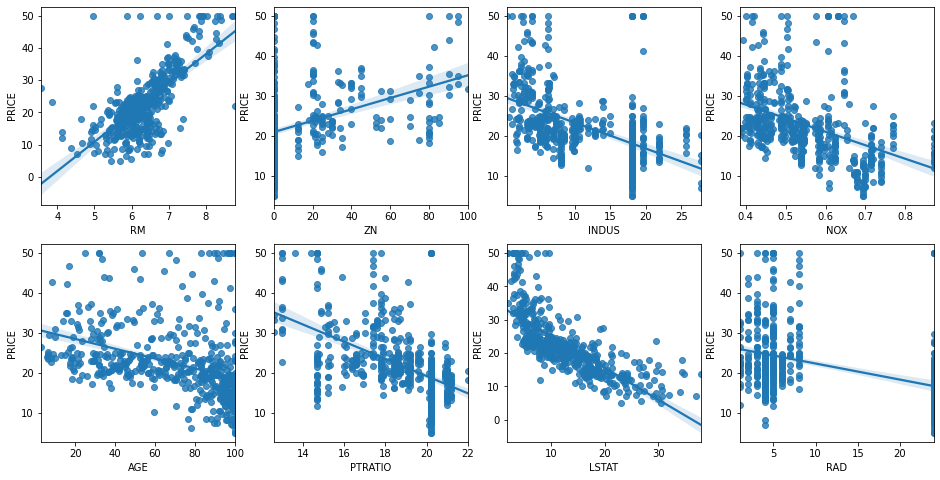

In [26]:
im_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

fig, ax = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)

for i, feature in enumerate(im_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y='PRICE', data = bostonDF, ax = ax[row][col])

In [30]:
X_feature = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
y_target = bostonDF['PRICE']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, 
                                                    test_size = 0.3, random_state = 156)

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {:.3f}'.format(r2_score(y_test, y_pred)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [33]:
print('절편 값 ', lr.intercept_)
print('회귀 계수 값 ', np.round(lr.coef_, 1))

절편 값  40.995595172164336
회귀 계수 값  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [35]:
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_feature.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [37]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, X_feature, y_target, scoring = 'neg_mean_squared_error', cv = 5 )
rmse_score = np.sqrt(-1*neg_mse_scores)
avg_score = np.mean(rmse_score)

print(' 5 folds 의 개별 negative MSE Score : ', np.round(neg_mse_scores, 2) )
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_score, 2))
print(' 5 folds 의 개별 평균 RMSE : ', np.round(avg_score, 3))

 5 folds 의 개별 negative MSE Score :  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 개별 평균 RMSE :  5.829
